In [1]:
import numpy as np

price = np.array([6, 6.05, 6.1])
vol = np.array([802000, 967000, 1132000])

prof = price * vol
cost = 0.55 * prof
gr_prof = prof - cost 
op_cost = 0.15 * gr_prof
net_prof = gr_prof - op_cost 
tax = net_prof * 0.32
CF = net_prof - tax
CF = np.append(-3400000, CF)
npv = np.npv(0.1,CF)
irr = np.irr(CF)
print(vol)  
print(CF) 
print(npv)
print(irr)

[ 802000  967000 1132000]
[-3400000.     1251601.2    1521676.035  1796042.52 ]
344796.1010518393
0.15331410149124514


In [2]:
import numpy.random as npr
npr.seed(888)
NPV = []
IRR = []

for i in range(10000): 
    price = npr.triangular([5.9,5.95,6], [6,6.05,6.1], [6.1,6.15,6.2], 3)
    vol = npr.normal([802,967,1132], [25,30,25], 3)*1000
    costdis = npr.triangular(0.5, 0.55, 0.65) 
    operdis = npr.normal(0.15, 0.02) 
    
    CF = (1 -  costdis) * (1 - operdis) * (1 - 0.32) * price * vol   
    CF = np.append(-3400000, CF)
    npv_new = np.npv(0.1,CF)
    irr_new = np.irr(CF)
    
    
    NPV = np.append(NPV, npv_new)
    IRR = np.append(IRR, np.irr(CF))
    
print('среднее значение чистой приведенной стоимости:',round(np.mean(NPV)),'стандартная ошибка:',round(np.std(NPV)))
print('среднее значение внутренней нормы доходности:',round(np.mean(IRR),3),'стандартная ошибка:', round(np.std(IRR),3))

среднее значение чистой приведенной стоимости: 202369.0 стандартная ошибка: 279395.0
среднее значение внутренней нормы доходности: 0.131 стандартная ошибка: 0.043


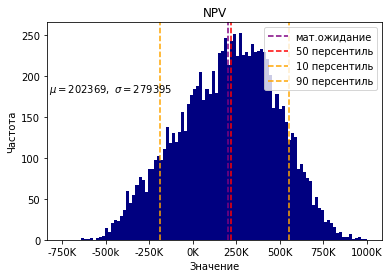

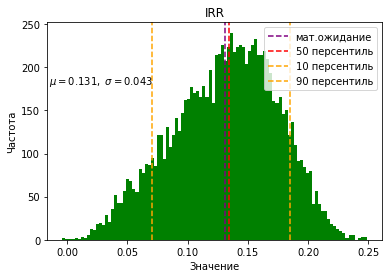

In [5]:
import matplotlib.pyplot as plt 

plt.hist(NPV, bins=100, range=[-750000, 1000000], facecolor='NAVY') 
plt.title('NPV') 
tick_val = [-750000, -500000, -250000,0, 250000, 500000, 750000,1000000]
tick_lab = ['-750K', '-500k', '-250K','0K','250K','500K','750K', '1000K']
plt.xticks(tick_val,tick_lab)
plt.text(-830000, 180, r'$\mu=202369,\ \sigma=279395$')
plt.axvline(x=np.mean(NPV) ,linestyle='dashed',color='purple')
plt.axvline(x=np.quantile(NPV, 0.5),linestyle='dashed',color='red')
plt.axvline(x=np.quantile(NPV, 0.1),linestyle='dashed',color='orange')
plt.axvline(x=np.quantile(NPV, 0.9),linestyle='dashed',color='orange')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.legend(('мат.ожидание','50 персентиль', '10 персентиль', '90 персентиль'),
           loc='upper right')
plt.show()


plt.hist(IRR, bins=100, facecolor='green') 
plt.title('IRR') 
plt.text(-0.015, 180, r'$\mu=0.131,\ \sigma=0.043$')
plt.axvline(x=np.mean(IRR) ,linestyle='dashed',color='purple')
plt.axvline(x=np.quantile(IRR, 0.5),linestyle='dashed',color='red')
plt.axvline(x=np.quantile(IRR, 0.1),linestyle='dashed',color='orange')
plt.axvline(x=np.quantile(IRR, 0.9),linestyle='dashed',color='orange')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.legend(('мат.ожидание','50 персентиль', '10 персентиль', '90 персентиль'),
           loc='upper right')
plt.show()

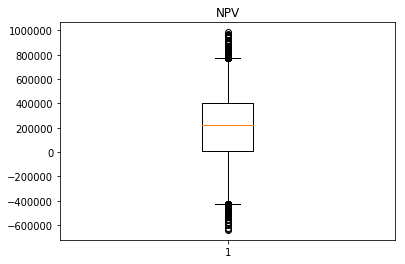

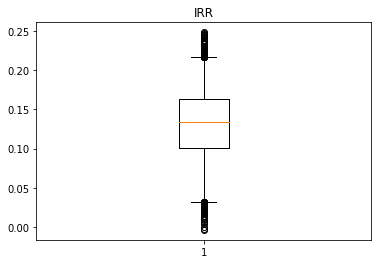

In [4]:
plt.boxplot(NPV, whis=[1, 99], widths=0.15)
plt.title('NPV') 
plt.show()
plt.boxplot(IRR, whis=[1, 99])
plt.title('IRR') 
plt.show()